In [1]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib import gridspec
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
%matplotlib inline

import matplotlib as mpl
mpl.rc('image', cmap='viridis')

In [22]:
y = np.array([30, 200, 310, 350, 400, 400, 450, 500, 530, 430, 650, 600, 790, 730, 740, 800, 850, 1200, 1400, 2100, 1800])
label_col = 'price'
features = ['size qm', 'rooms', 'distance to center km']
x1 = [12, 15, 20, 21, 18, 24, 24, 28, 35, 25, 40, 28, 45, 40, 42, 55, 60, 80, 85, 120, 90]
x2 = [ 1, 1,  1,  1, 1, 1.5,1.5,  2,  2,1.5,  2,  2,  2,  2,  2,  3,  3,  3,  3,   4,  4]
x3 = [20, 3,  6,  4,  2, 12, 10,  8, 15, 16, 13, 14,  8, 12, 11,  9,  8,  4,  3,   6,  5]
featureVals = [x1,x2,x3]
X = np.array(featureVals).T
print(X.shape, y.shape)

dataDic = {}
for i in range(len(features)):
    dataDic[features[i]] = np.array(featureVals[i])
dataDic[label_col] = y

data = pd.DataFrame(dataDic)
data.head()

(21, 3) (21,)


,size qm,rooms,distance to center km,price
0,12,1.0,20,30
1,15,1.0,3,200
2,20,1.0,6,310
3,21,1.0,4,350
4,18,1.0,2,400


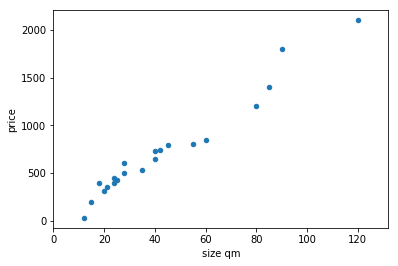

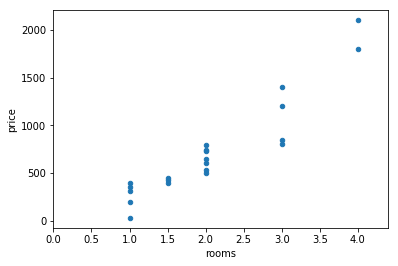

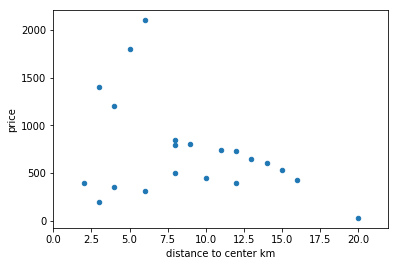

In [23]:
for f in features:
    ax = data.plot.scatter(x=f, y='price')
    ax.set_xlim(0, max(data[f])*1.1)
    plt.savefig(str(f)+'_price.png', dpi=300)


In [31]:
X = data[features].to_numpy()
y = data[label_col].to_numpy()
print(X.shape, y.shape)

(21, 3) (21,)


# Find good weights using OLS regression

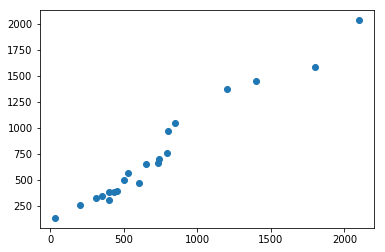

[15.28163676 61.98215105 -4.71368787] -19.32290958439603


In [33]:
clf = LinearRegression()
clf.fit(X,y)
pred = clf.predict(X)
plt.scatter(y,pred)
plt.show()
print(clf.coef_, clf.intercept_)

# Defining a Single Neuron

In [42]:
class a:
    def __init__(self, theta = 0.0):
        self.theta = theta
    def __call__(self, x):
        if x <= self.theta:
            return 0.0
        else:
            return x
        
class Neuron:
    def __init__(self, activation, weights, bias):
        self.activation = activation
        self.setWeights(weights, bias)
        
    def setWeights(self, weights, bias = None):
        self.weights = weights
        self.bias = bias
        
    def getWeights(self):
        return self.weights, self.bias
    
    def __call__(self, x):
        val = np.dot(self.weights,x) + self.bias
        return self.activation(val)

# Testing that Single Neuron

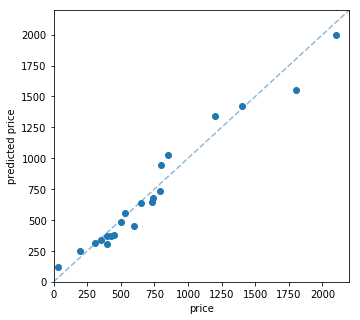

In [55]:
neuron = Neuron(a(), [15., 61., -5.], -19)
pred = []
for x in X:
    pred.append(neuron(x))
pred = np.array(pred)
plt.figure(figsize=(5.3,5)) 
plt.scatter(y,pred)
plt.xlabel('price')
plt.ylabel('predicted price')
plt.xlim((0,2200))
plt.ylim((0,2200))
plt.plot([0,2200],[0,2200], "--", alpha=0.5)
plt.savefig('neuronPrediction.png', dpi=300)
plt.show()